<a href="https://www.kaggle.com/code/nooralrajab/arrhythmia-classificaiton-ipynb?scriptVersionId=220152216" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
with_ppg=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input/challenge2015-reducing-false-arrhythmia/Challenge2015_csv/'):
    for filename in filenames:
        if(filename!="ALARMS"):
            if("PLETH" in pd.read_csv(dirname+filename).columns):
                with_ppg.append(filename[0:-4])

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Start with 2015 dataset and remove samples with asystole

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df=pd.read_csv("/kaggle/input/challenge2015-reducing-false-arrhythmia/Challenge2015_csv/ALARMS", names=["Sample", "Label", "TrueAlarm"])
df_relevant=df.loc[df["Label"]!="Asystole"].copy()
df_relevant

Sample                    Label  TrueAlarm
0    v100s  Ventricular_Tachycardia          0
1    v101l  Ventricular_Tachycardia          0
2    v102s  Ventricular_Tachycardia          0
6    t106s              Tachycardia          1
7    t107l              Tachycardia          1
..     ...                      ...        ...
744  v844s  Ventricular_Tachycardia          1
745  v845l  Ventricular_Tachycardia          0
746  v846s  Ventricular_Tachycardia          0
748  v848s  Ventricular_Tachycardia          0
749  b849l              Bradycardia          0

[628 rows x 3 columns]

## Remove samples without PPG

In [4]:
df_filtered=df_relevant.loc[df_relevant["Sample"].isin(with_ppg)].copy()
df_filtered

Sample                    Label  TrueAlarm
0    v100s  Ventricular_Tachycardia          0
1    v101l  Ventricular_Tachycardia          0
2    v102s  Ventricular_Tachycardia          0
6    t106s              Tachycardia          1
7    t107l              Tachycardia          1
..     ...                      ...        ...
740  b840s              Bradycardia          1
743  v843l  Ventricular_Tachycardia          0
746  v846s  Ventricular_Tachycardia          0
748  v848s  Ventricular_Tachycardia          0
749  b849l              Bradycardia          0

[521 rows x 3 columns]

## Adding a path column

In [5]:
df_filtered["Path"]=["/kaggle/input/challenge2015-reducing-false-arrhythmia/Challenge2015_csv/"+x+".csv" for x in df_filtered["Sample"]]
df_filtered

Sample                    Label  TrueAlarm  \
0    v100s  Ventricular_Tachycardia          0   
1    v101l  Ventricular_Tachycardia          0   
2    v102s  Ventricular_Tachycardia          0   
6    t106s              Tachycardia          1   
7    t107l              Tachycardia          1   
..     ...                      ...        ...   
740  b840s              Bradycardia          1   
743  v843l  Ventricular_Tachycardia          0   
746  v846s  Ventricular_Tachycardia          0   
748  v848s  Ventricular_Tachycardia          0   
749  b849l              Bradycardia          0   

                                                  Path  
0    /kaggle/input/challenge2015-reducing-false-arr...  
1    /kaggle/input/challenge2015-reducing-false-arr...  
2    /kaggle/input/challenge2015-reducing-false-arr...  
6    /kaggle/input/challenge2015-reducing-false-arr...  
7    /kaggle/input/challenge2015-reducing-false-arr...  
..                                                 ...  
740  /kaggle/input/challenge2015-reducing-false-arr...  
743  /kaggle/input/challenge2015-reducing-false-arr...  
746  /kaggle/input/challenge2015-reducing-false-arr...  
748  /kaggle/input/challenge2015-reducing-false-arr...  
749  /kaggle/input/challenge2015-reducing-false-arr...  

[521 rows x 4 columns]

## Get paths and sample names from A-Fib dataset

In [6]:
afib_paths=[]
healthy_paths=[]
afib_samples=[]
healthy_samples=[]

for dirname, _, filenames in os.walk('/kaggle/input/mimic-perform-af-dataset/mimic_perform_af_csv/mimic_perform_af_csv'):
    for filename in filenames:
        if("csv" in filename):
            afib_paths.append(dirname+"/"+filename)
            filename_split=filename.split("_")
            afib_samples.append(filename_split[2]+"_"+filename_split[3])

for dirname, _, filenames in os.walk('/kaggle/input/mimic-perform-af-dataset/mimic_perform_non_af_csv/mimic_perform_non_af_csv'):
    for filename in filenames:
        if("csv" in filename):
            healthy_paths.append(dirname+"/"+filename)
            filename_split=filename.split("_")
            healthy_samples.append(filename_split[2]+"_"+filename_split[3]+"_"+filename_split[4])

In [7]:
afib_df=pd.DataFrame({"Sample":afib_samples,
        "Label":19*["Atrial_Fibrillation"],
        "TrueAlarm":19*[True],
        "Path":afib_paths})

healthy_df=pd.DataFrame({"Sample":healthy_samples,
        "Label":16*["Healthy"],
        "TrueAlarm":16*[True],
        "Path":healthy_paths})

df_filtered=pd.concat([df_filtered, afib_df, healthy_df])
df_filtered

Sample                    Label  TrueAlarm  \
0        v100s  Ventricular_Tachycardia          0   
1        v101l  Ventricular_Tachycardia          0   
2        v102s  Ventricular_Tachycardia          0   
6        t106s              Tachycardia          1   
7        t107l              Tachycardia          1   
..         ...                      ...        ...   
11  non_af_012                  Healthy          1   
12  non_af_003                  Healthy          1   
13  non_af_004                  Healthy          1   
14  non_af_001                  Healthy          1   
15  non_af_013                  Healthy          1   

                                                 Path  
0   /kaggle/input/challenge2015-reducing-false-arr...  
1   /kaggle/input/challenge2015-reducing-false-arr...  
2   /kaggle/input/challenge2015-reducing-false-arr...  
6   /kaggle/input/challenge2015-reducing-false-arr...  
7   /kaggle/input/challenge2015-reducing-false-arr...  
..                                                ...  
11  /kaggle/input/mimic-perform-af-dataset/mimic_p...  
12  /kaggle/input/mimic-perform-af-dataset/mimic_p...  
13  /kaggle/input/mimic-perform-af-dataset/mimic_p...  
14  /kaggle/input/mimic-perform-af-dataset/mimic_p...  
15  /kaggle/input/mimic-perform-af-dataset/mimic_p...  

[556 rows x 4 columns]

## Get statistics of how many waveforms are available for each condition

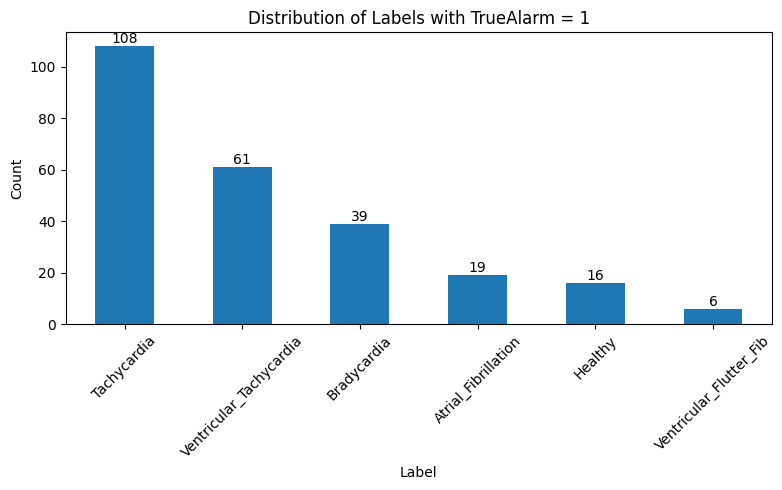

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df_filtered.loc[df_filtered["TrueAlarm"] == 1, "Label"].value_counts()

# Plot as a bar plot
label_counts.plot(kind="bar", figsize=(8, 5))
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels with TrueAlarm = 1")
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0])  # Add count labels on bars
plt.tight_layout()
plt.show()


## Resampling attempt: from 125 Hz to 250 Hz sampling frequency

In [9]:
import numpy as np

signal=pd.read_csv("/kaggle/input/mimic-perform-af-dataset/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_001_data.csv")["ECG"].values[0:100]

# Original ECG signal and sampling frequency
ecg_signal = np.array(signal)  # Replace with your ECG data
fs_original = 125  # Original sampling frequency
fs_new = 250  # New sampling frequency

# Create new time points
original_time = np.arange(len(ecg_signal)) / fs_original
new_time = np.arange(0, original_time[-1], 1/fs_new)

# Interpolate using the average of surrounding points
from scipy.interpolate import interp1d
interp_function = interp1d(original_time, ecg_signal, kind='linear')  # Linear interpolation
new_ecg_signal = interp_function(new_time)

# Output new signal
print("Resampled ECG Signal:", new_ecg_signal)


Resampled ECG Signal: [0.31445312 0.29980469 0.28515625 0.29296875 0.30078125 0.30273438
 0.3046875  0.29980469 0.29492188 0.29492188 0.29492188 0.29492188
 0.29492188 0.29785156 0.30078125 0.30078125 0.30078125 0.30273438
 0.3046875  0.30273438 0.30078125 0.30273438 0.3046875  0.30761719
 0.31054688 0.31054688 0.31054688 0.3125     0.31445312 0.31933594
 0.32421875 0.32421875 0.32421875 0.32421875 0.32421875 0.32421875
 0.32421875 0.33007812 0.3359375  0.3359375  0.3359375  0.3359375
 0.3359375  0.3359375  0.3359375  0.34082031 0.34570312 0.35058594
 0.35546875 0.35546875 0.35546875 0.35742188 0.359375   0.36230469
 0.36523438 0.37011719 0.375      0.37792969 0.38085938 0.38085938
 0.38085938 0.38574219 0.390625   0.39746094 0.40429688 0.40722656
 0.41015625 0.41308594 0.41601562 0.42089844 0.42578125 0.43066406
 0.43554688 0.44238281 0.44921875 0.45507812 0.4609375  0.46582031
 0.47070312 0.47558594 0.48046875 0.48242188 0.484375   0.48242188
 0.48046875 0.47753906 0.47460937 0.46191

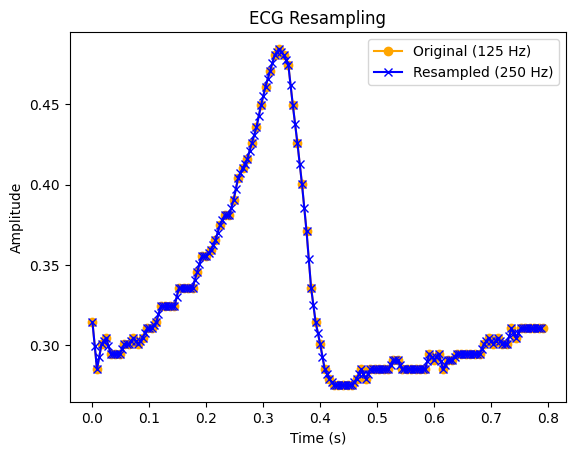

In [10]:
import matplotlib.pyplot as plt

plt.plot(original_time, ecg_signal, label="Original (125 Hz)", marker='o', color='orange')
plt.plot(new_time, new_ecg_signal, label="Resampled (250 Hz)", marker='x', color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("ECG Resampling")
plt.show()


## Resampling function

In [11]:
import numpy as np
from scipy.interpolate import interp1d

def resample(signal, fs_original=125, fs_new=250):
    # Original ECG signal and sampling frequency
    ecg_signal = np.array(signal)  # Replace with your ECG data
    
    # Create new time points
    original_time = np.arange(len(ecg_signal)) / fs_original
    new_time = np.arange(0, original_time[-1], 1/fs_new)
    
    # Interpolate using the average of surrounding points
    interp_function = interp1d(original_time, ecg_signal, kind='linear')  # Linear interpolation
    new_ecg_signal = interp_function(new_time)
    
    return new_ecg_signal


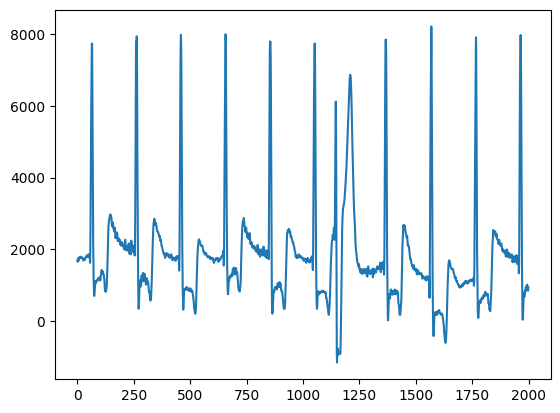

In [12]:
plt.plot(pd.read_csv(df_filtered.loc[(df_filtered["Label"]=="Ventricular_Tachycardia") & (df_filtered["TrueAlarm"]==1), "Path"].values[0])["II"].values[30000:32000])

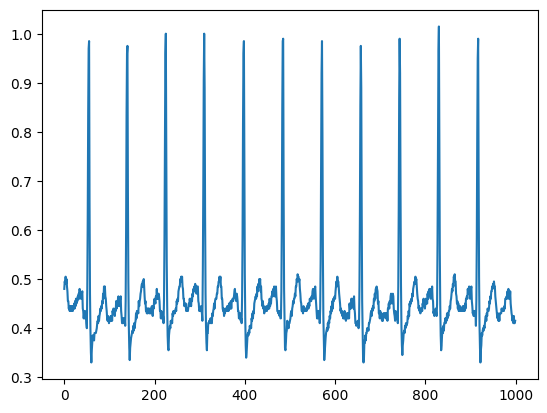

In [13]:
plt.plot(pd.read_csv(df_filtered.loc[df_filtered["Label"]=="Healthy", "Path"].values[0])["ECG"].values[70000:71000])

## getWaveform
A function that returns a single interval of the desired condition, signal type, offset, and duration. It also resamples if the source waveform has a sampling frequency of 125 instead of 250.

In [14]:
chunk_len=2048

def standardize(data):
    return ( data - np.mean(data) ) / np.std(data)

def getWaveform(label, index, sampleType, startPoint=0, duration=chunk_len, trueAlarm=1):
    if(label=="Atrial_Fibrillation" or label=="Healthy"):
        return resample(standardize(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values[startPoint:startPoint+int(duration/2)]))
    else:
        if(sampleType=="ECG"):
            sampleType="II"
        elif(sampleType=="PPG"):
            sampleType="PLETH"
        try:
            return standardize(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values[startPoint:startPoint+duration])
        except:
            return standardize(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])["V"].values[startPoint:startPoint+duration])

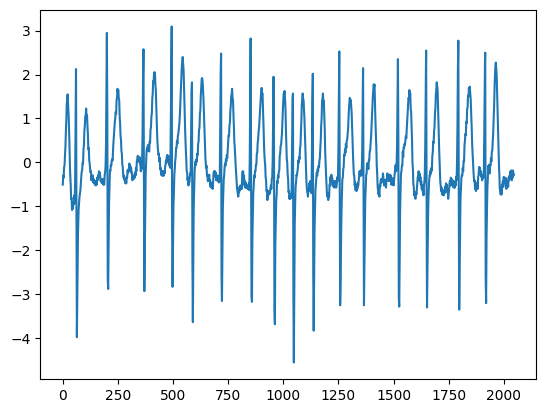

In [15]:
plt.plot(getWaveform("Atrial_Fibrillation", 0, "ECG"))

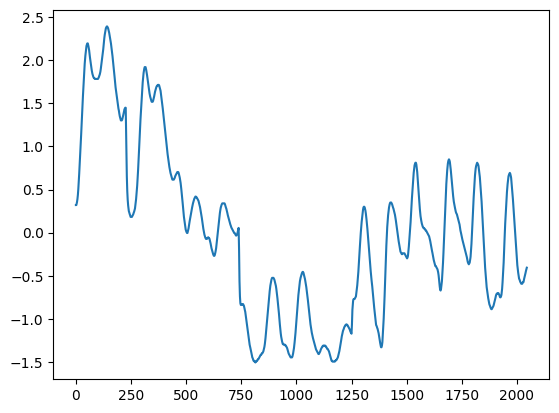

In [16]:
plt.plot(getWaveform("Atrial_Fibrillation", 0, "PPG"))

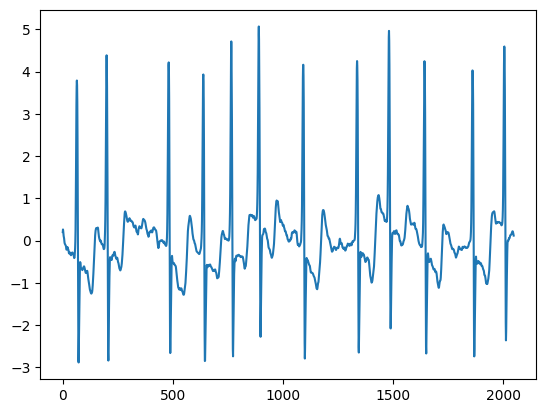

In [17]:
plt.plot(getWaveform("Ventricular_Flutter_Fib", 3, "ECG"))

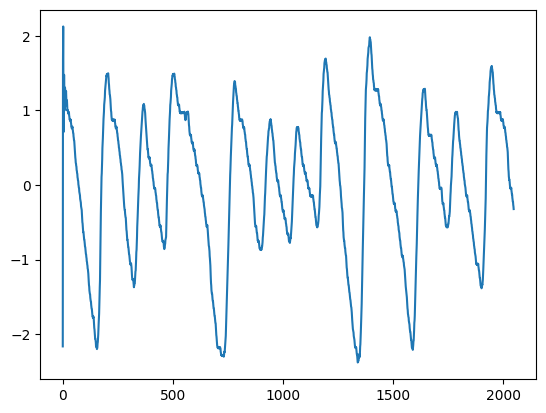

In [18]:
plt.plot(getWaveform("Ventricular_Flutter_Fib", 3, "PPG"))

## getWaveforms
A function that returns a **list** of intervals included in the full waveform.

In [66]:
def getWaveforms(label, index, sampleType, duration=chunk_len, trueAlarm=1):
    if(label=="Atrial_Fibrillation" or label=="Healthy"):
        fullWaveform = resample(pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values)
        periodsList=[]
        for i in range(int(np.floor(len(fullWaveform)/duration))):
            periodsList.append(fullWaveform[i*duration:(i*duration)+duration])
    else:
        if(sampleType=="ECG"):
            sampleType="II"
        elif(sampleType=="PPG"):
            sampleType="PLETH"
        try:
            fullWaveform = pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])[sampleType].values
        except:
            fullWaveform = pd.read_csv(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm), "Path"].values[index])["V"].values
        periodsList=[]
        for i in range(int(np.floor(len(fullWaveform)/duration))):
            periodsList.append(fullWaveform[i*duration:(i*duration)+duration])
    return periodsList

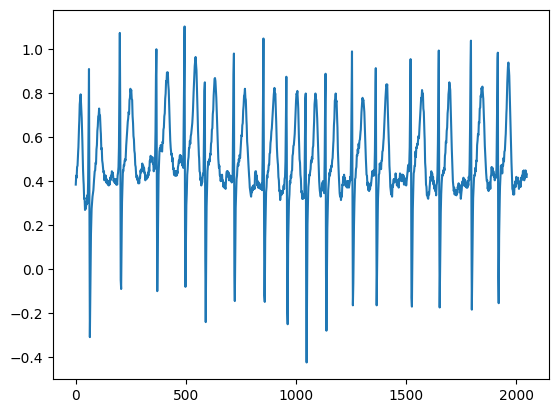

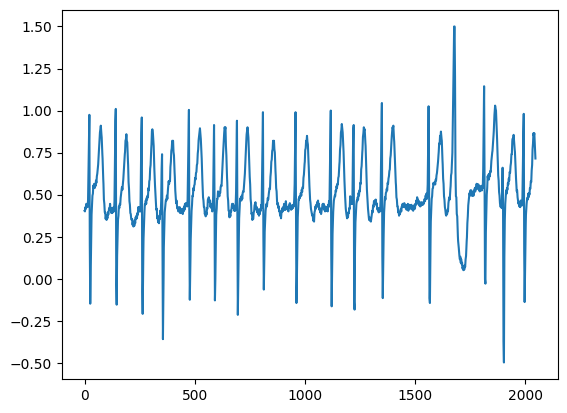

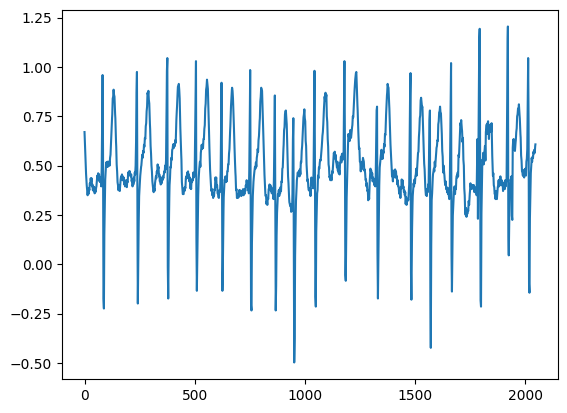

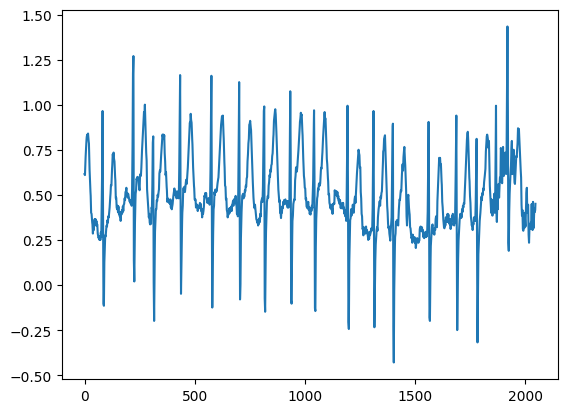

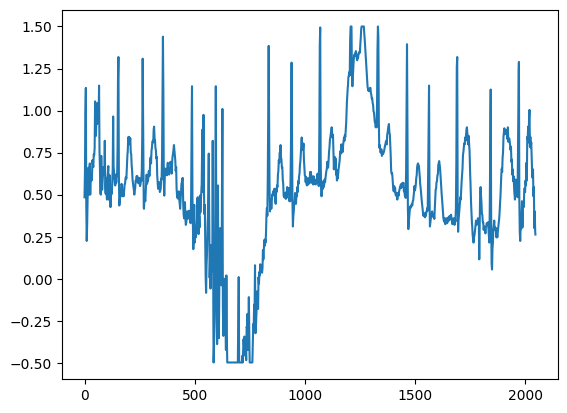

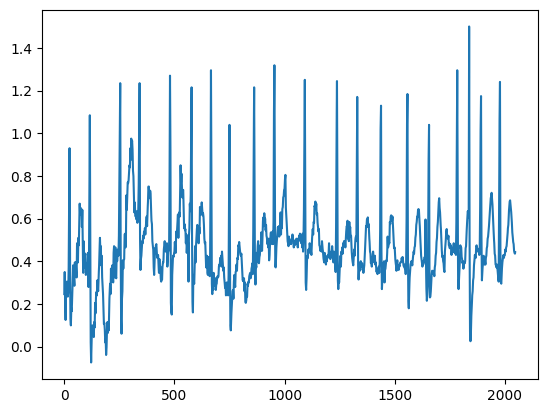

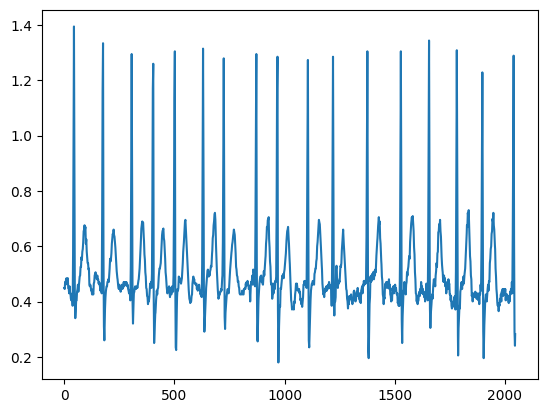

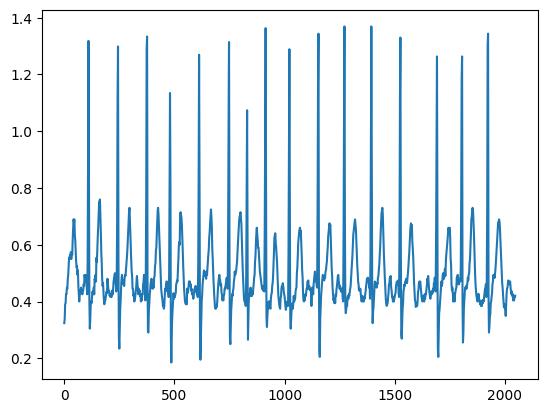

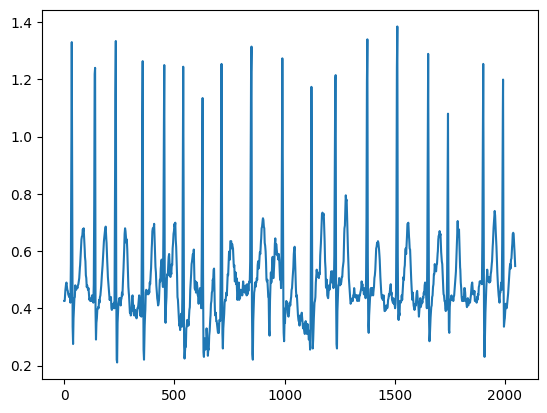

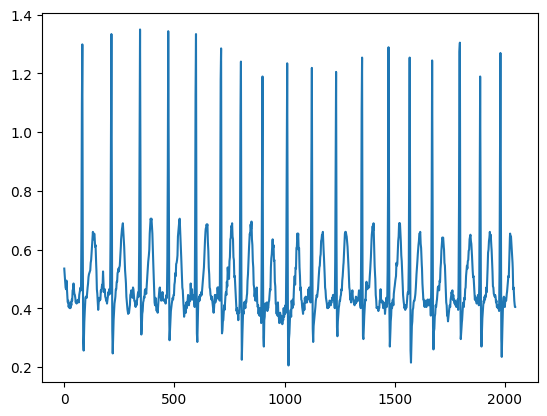

In [20]:
periods=getWaveforms("Atrial_Fibrillation", 0, "ECG")
for i in range(10):
    plt.plot(periods[i])
    plt.show()

## Plot FFT peaks

Ventricular_Flutter_Fib


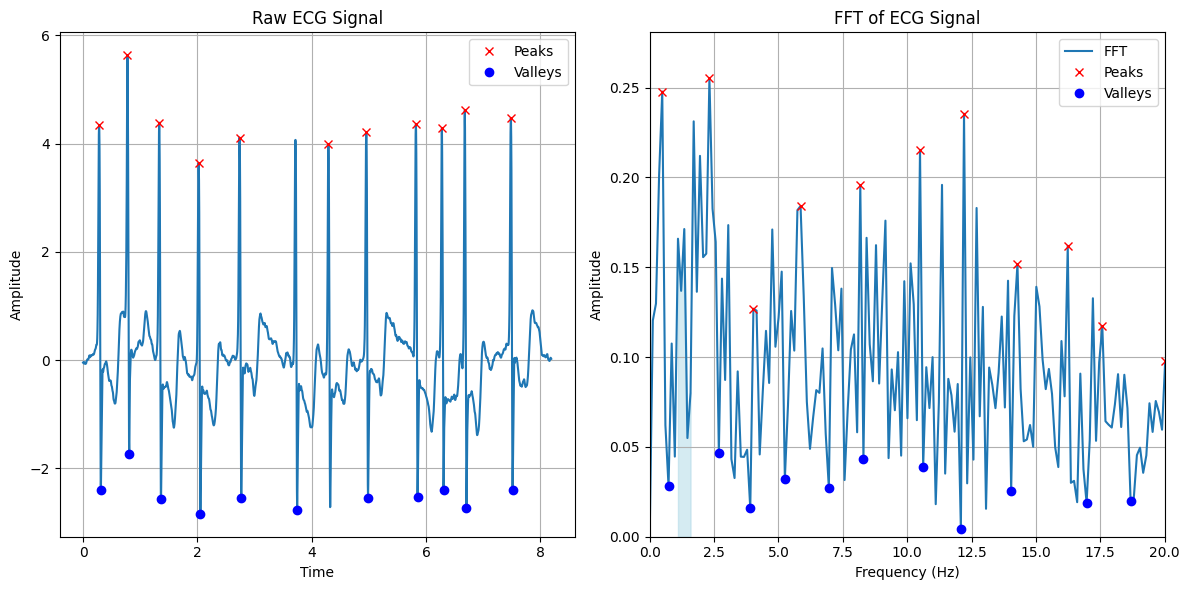

Ventricular_Flutter_Fib


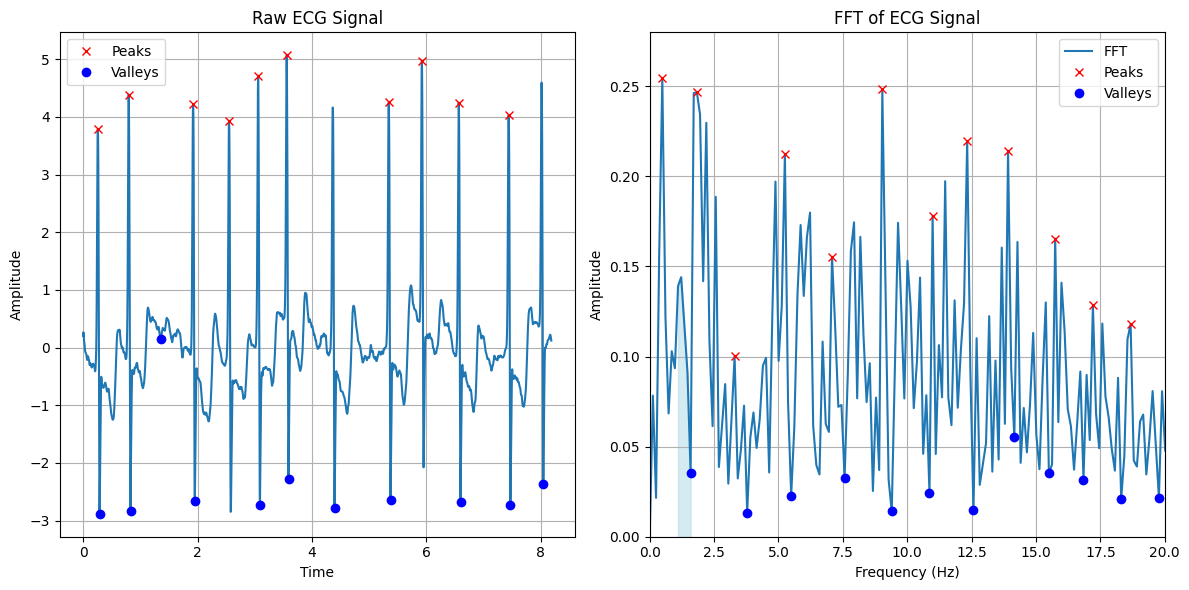

Ventricular_Tachycardia


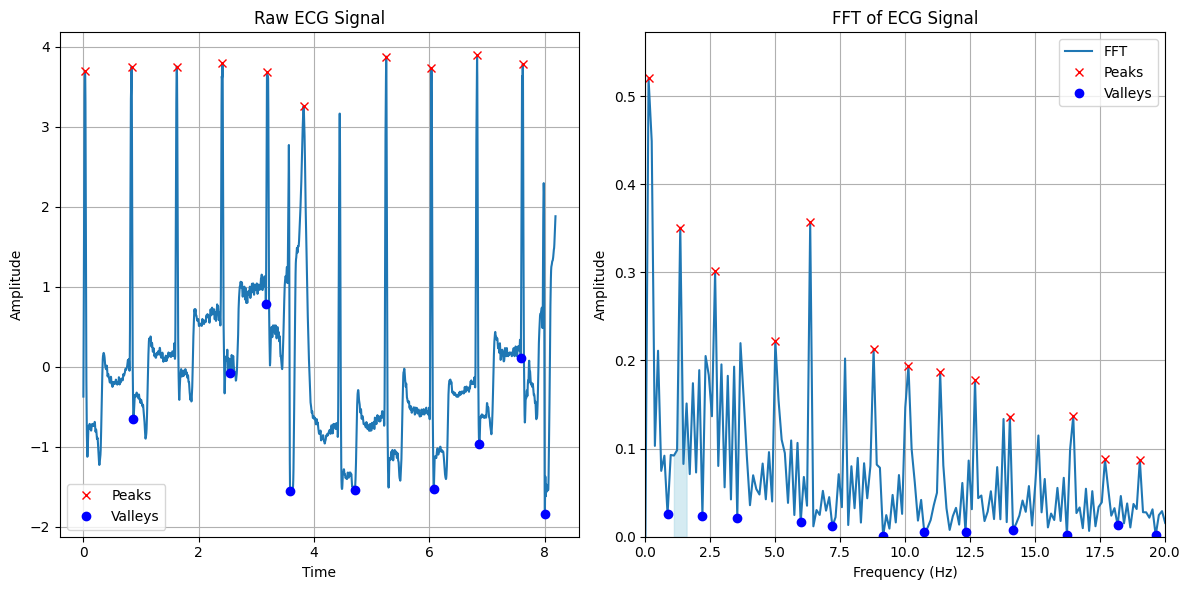

Ventricular_Tachycardia


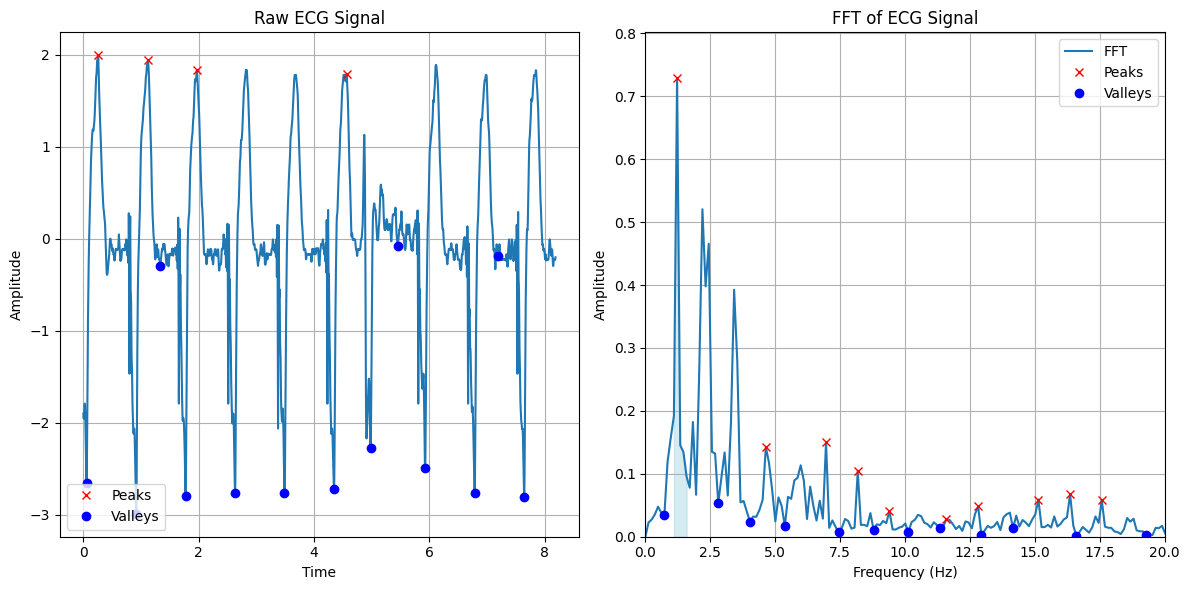

Tachy


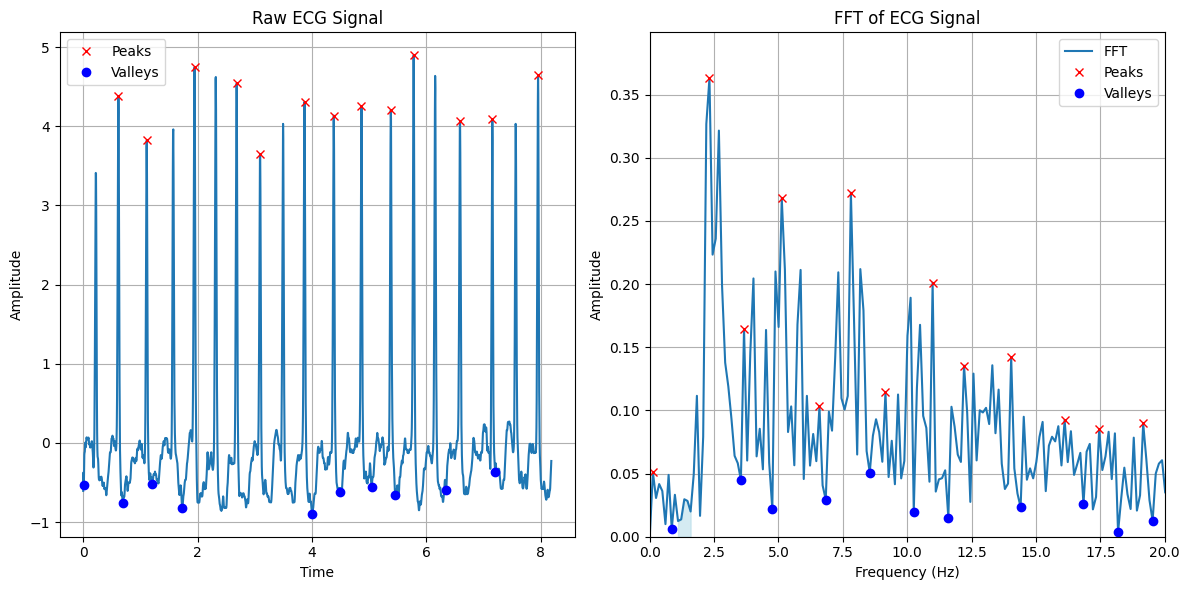

Brady


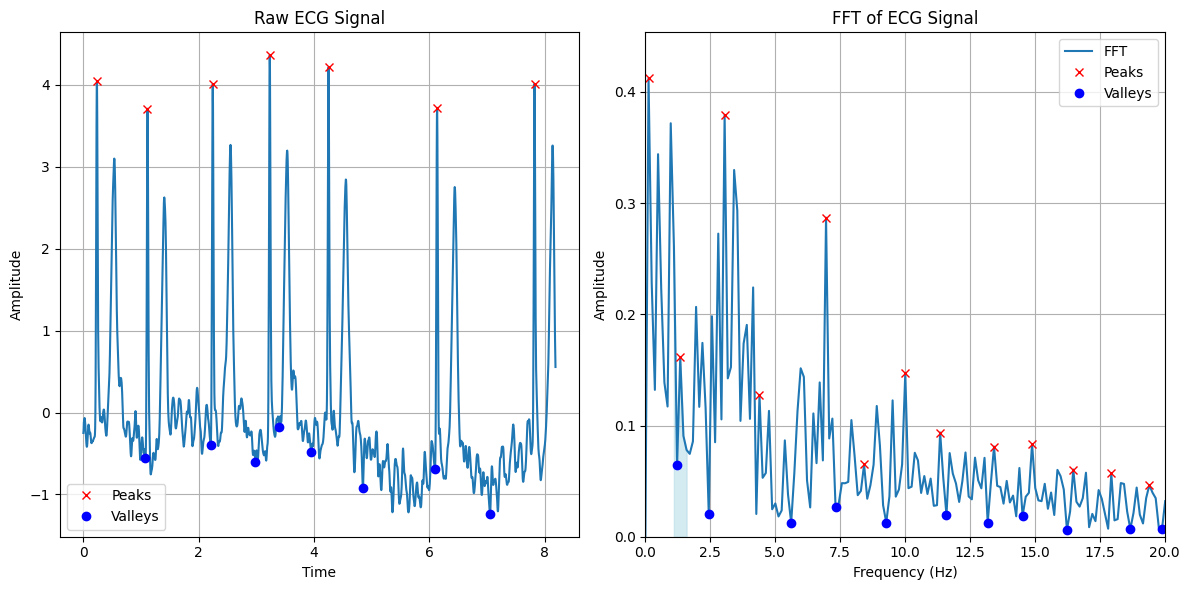

Afib


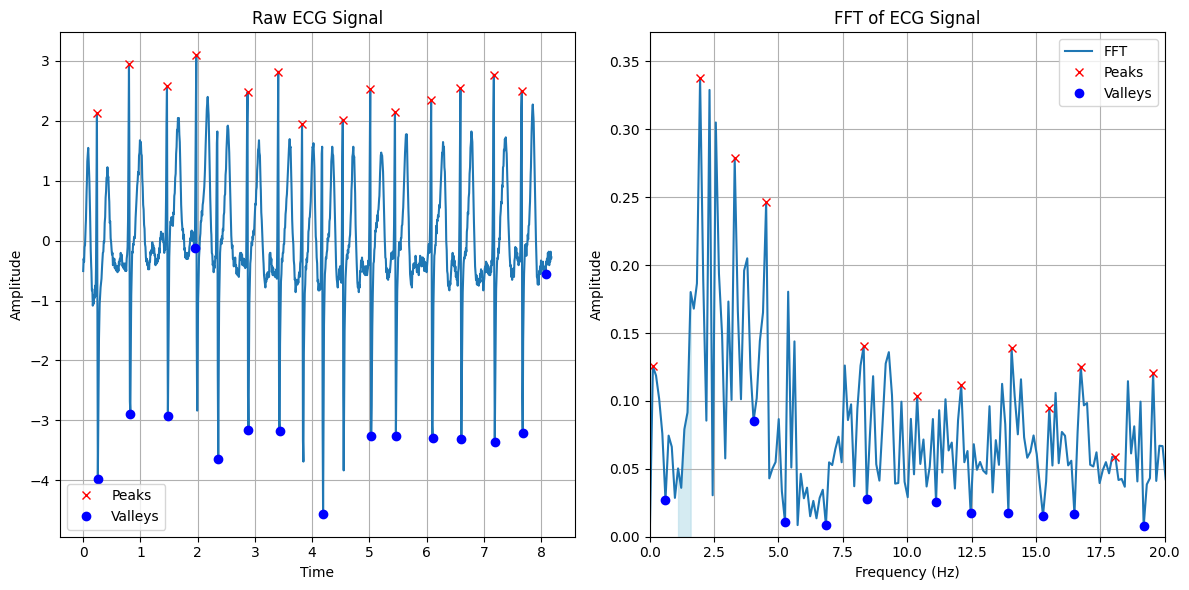

Healthy


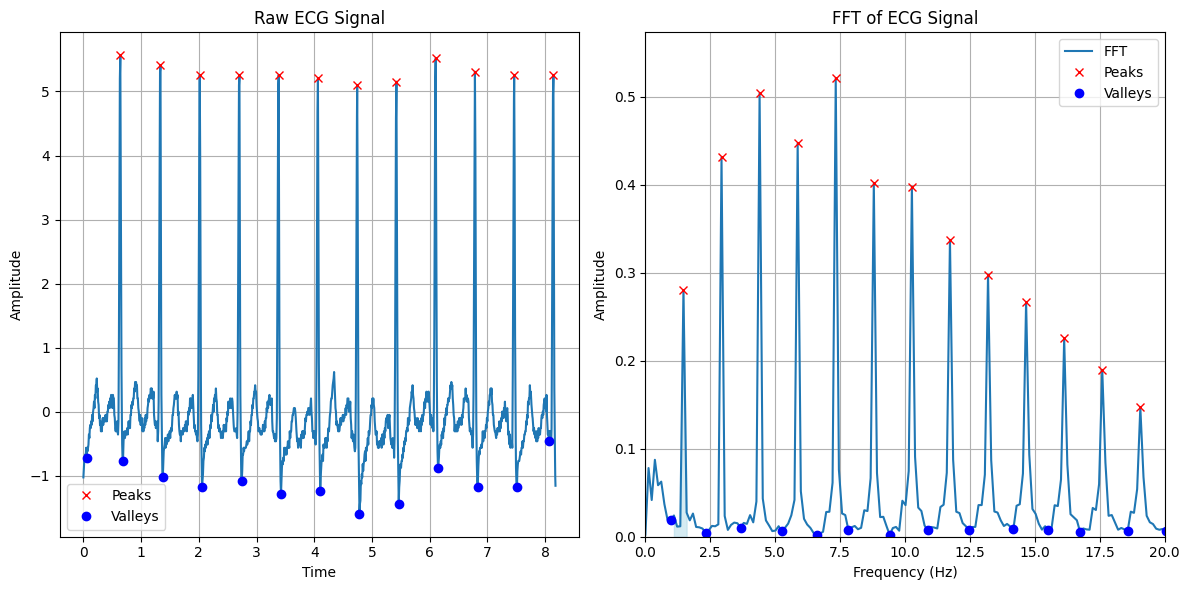

In [21]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

# List of signals
signals = [getWaveform("Ventricular_Flutter_Fib", 2, "ECG"),
           getWaveform("Ventricular_Flutter_Fib", 3, "ECG"),
           getWaveform("Ventricular_Tachycardia", 0, "ECG"),
           getWaveform("Ventricular_Tachycardia", 1, "ECG"),
           getWaveform("Tachycardia", 0, "ECG"),
           getWaveform("Bradycardia", 0, "ECG"),
           getWaveform("Atrial_Fibrillation", 0, "ECG"),
          getWaveform("Healthy", 0, "ECG")]
signal_labels = ["Ventricular_Flutter_Fib", "Ventricular_Flutter_Fib", "Ventricular_Tachycardia", "Ventricular_Tachycardia", "Tachy", "Brady", "Afib", "Healthy"]
#signals=getWaveforms("Tachycardia",1, "ECG")
for i, signal in enumerate(signals):
    print(signal_labels[i])
    # Time-domain parameters
    N = len(signal)
    t = np.arange(N) / fs  # Generates time values from 0 to (N-1)/fs

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    fft_peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=10,
                          prominence=0.0005,
                          width=2,
                          rel_height=1.5)
    
    fft_valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=10,
                          prominence=0.0005,
                          width=2,
                          rel_height=1)

    # Time domain features
    td_peaks, _ = find_peaks(signal,
                          height=1, 
                          threshold=0.01, 
                          distance=0.4*fs,
                          prominence=0.1,
                          width=None,
                          rel_height=None)
    
    td_valleys, _ = find_peaks(-signal,
                          height=None, 
                          threshold=0.01, 
                          distance=0.4*fs,
                          prominence=0.1,
                          width=None,
                          rel_height=None)

    # Plot raw signal and its FFT
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Left plot: Raw signal
    ax[0].plot(t, signal)
    ax[0].plot(t[td_peaks], signal[td_peaks], "x", label="Peaks", color='red')
    ax[0].plot(t[td_valleys], signal[td_valleys], "o", label="Valleys", color='blue')
    ax[0].set_title('Raw ECG Signal')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[0].grid()
    ax[0].legend()

    # Right plot: FFT
    ax[1].plot(xf, yf_processed, label='FFT')
    ax[1].plot(xf[fft_peaks], yf_processed[fft_peaks], "x", label="Peaks", color='red')
    ax[1].plot(xf[fft_valleys], yf_processed[fft_valleys], "o", label="Valleys", color='blue')
    ax[1].fill_between(xf, yf_processed, where=(xf >= 1) & (xf <= 1.67), color='lightblue', alpha=0.5)
    ax[1].set_xlim([0, 20])
    ax[1].set_ylim([0, max(yf_processed) * 1.1])  # Dynamic amplitude limit
    ax[1].set_title('FFT of ECG Signal')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].grid()
    ax[1].legend()

    plt.tight_layout()
    plt.show()


## Try different values for some parameters

1


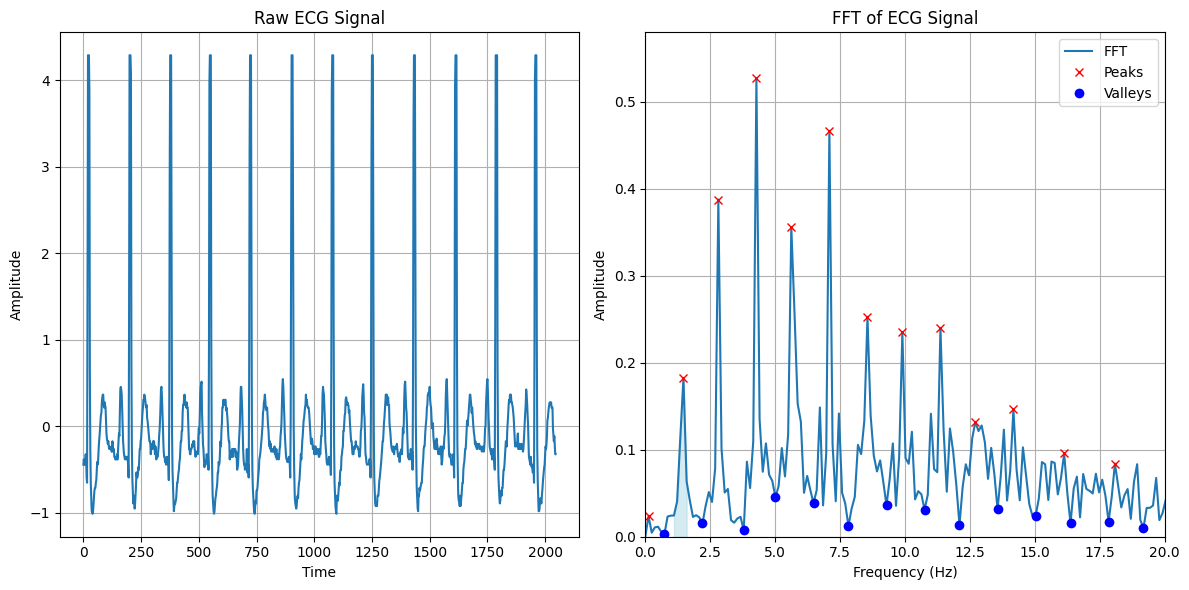

1.5


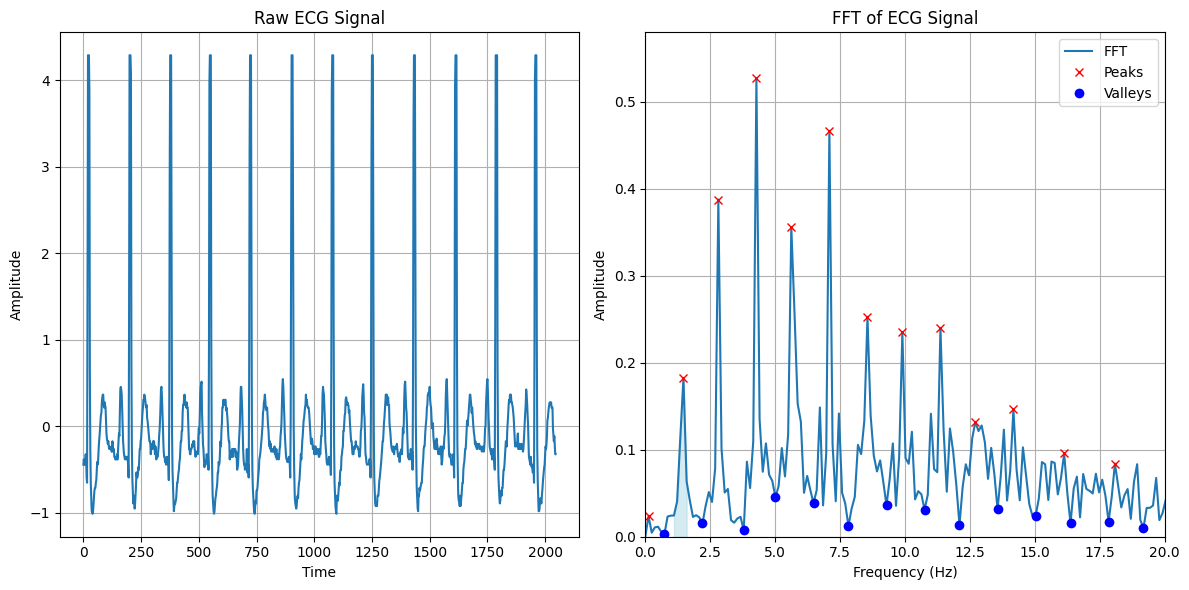

2


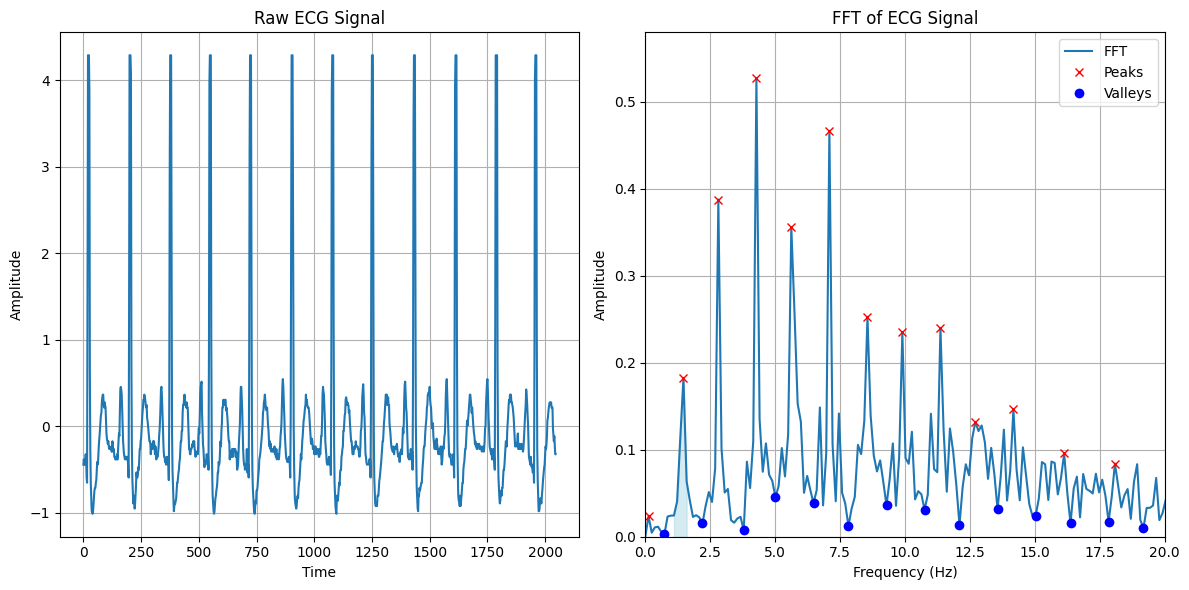

2.5


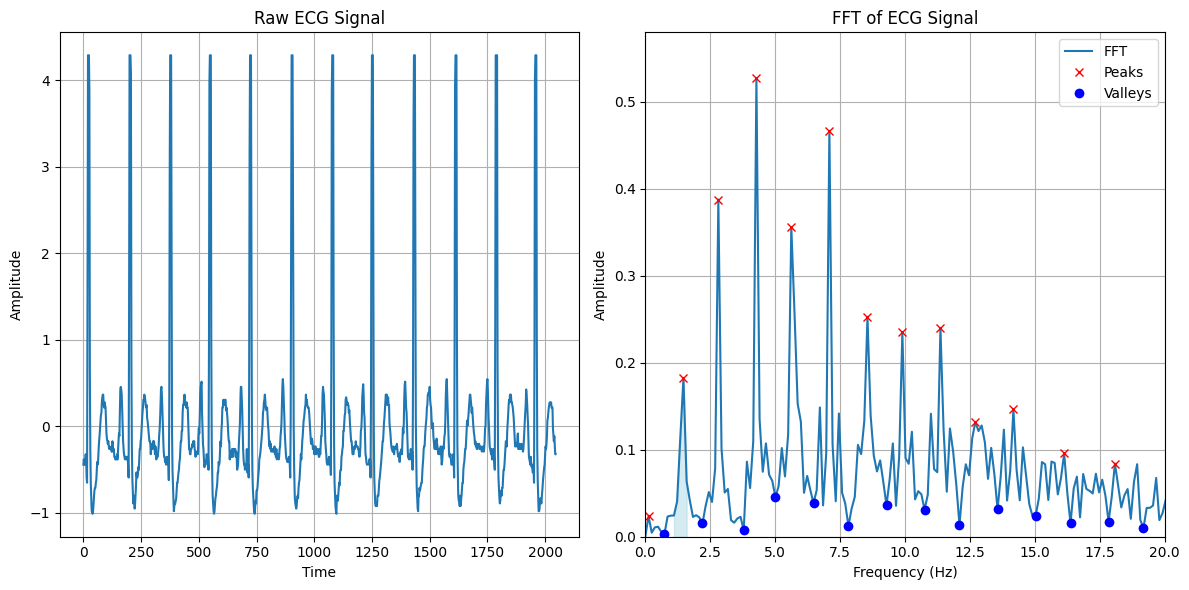

3


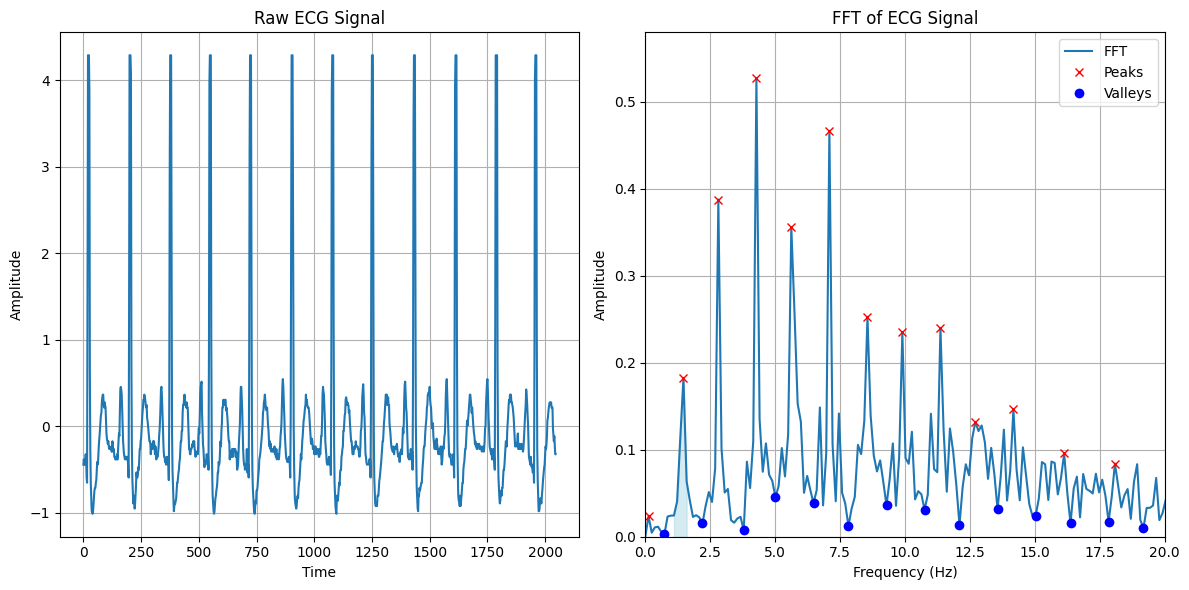

5


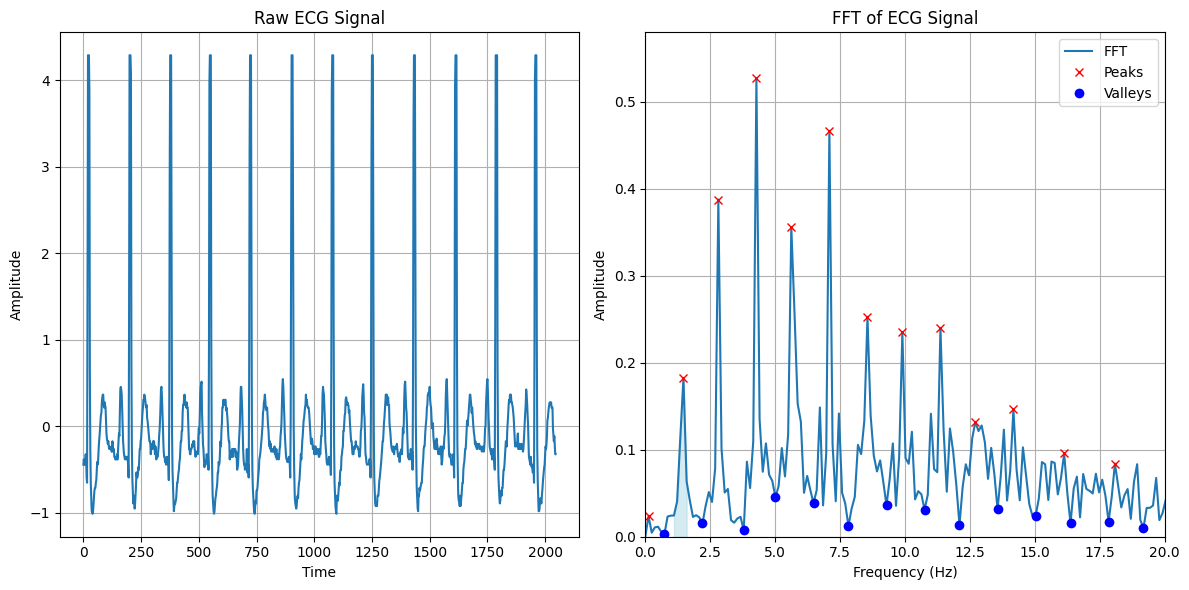

10


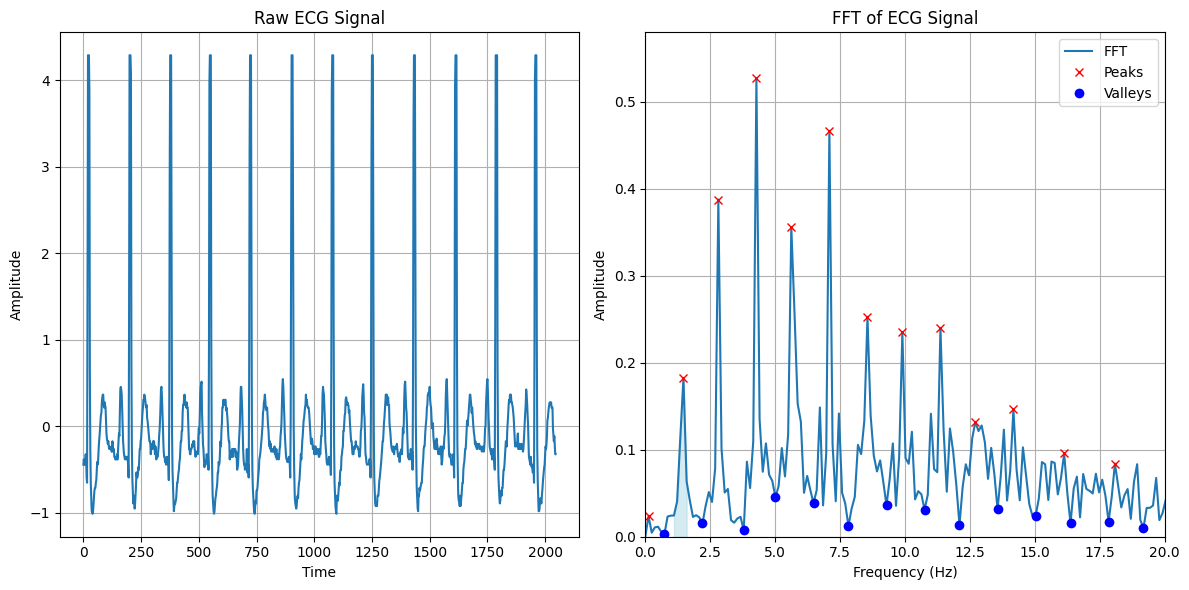

In [22]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

# List of signals
signal = getWaveform("Healthy", 6, "ECG")
vals=[1, 1.5, 2, 2.5, 3, 5, 10]

for val in vals:
    print(val)
    # Time-domain parameters
    N = len(signal)

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=10,
                          prominence=0.0005,
                          width=2,
                          rel_height=1.5)
    
    valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=10,
                          prominence=0.0005,
                          width=2,
                          rel_height=1)

    # Plot raw signal and its FFT
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Left plot: Raw signal
    ax[0].plot(signal)
    ax[0].set_title('Raw ECG Signal')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[0].grid()

    # Right plot: FFT
    ax[1].plot(xf, yf_processed, label='FFT')
    ax[1].plot(xf[peaks], yf_processed[peaks], "x", label="Peaks", color='red')
    ax[1].plot(xf[valleys], yf_processed[valleys], "o", label="Valleys", color='blue')
    ax[1].fill_between(xf, yf_processed, where=(xf >= 1) & (xf <= 1.67), color='lightblue', alpha=0.5)
    ax[1].set_xlim([0, 20])
    ax[1].set_ylim([0, max(yf_processed) * 1.1])  # Dynamic amplitude limit
    ax[1].set_title('FFT of ECG Signal')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].grid()
    ax[1].legend()

    plt.tight_layout()
    plt.show()


In [23]:
def get_num_waves(label, trueAlarm=1):
    return len(df_filtered.loc[(df_filtered["Label"]==label) & (df_filtered["TrueAlarm"]==trueAlarm)].index)

get_num_waves("Healthy")

16

## Collect features

In [24]:
def getIntervals(points):
    intervals=[]
    for pi in range(len(points)-1):
            intervals.append(points[pi+1]-points[pi])
    return intervals

In [68]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

labels=[]
labels_passed=[]
diff_median=[]
distance_median=[]
distance_std=[]
num_peaks=[]
num_valleys=[]
first_peak_freq=[]
second_peak_freq=[]
rr_median=[]
rr_std=[]
ss_median=[]
ss_std=[]

signals=[]

for label in df_filtered["Label"].unique():
    # Append true alarms
    for i in range(get_num_waves(label)):
        waveform_parts=getWaveforms(label, i, "ECG")
        signals.extend(waveform_parts)
        labels.extend(len(waveform_parts)*[label])
    # Append a false alarm
    for i in range(get_num_waves(label, 0)):
        waveform_parts=getWaveforms(label, 0, "ECG", trueAlarm=0)
        signals.extend(waveform_parts)
        labels.extend(len(waveform_parts)*["Healthy"])


for i, signal in enumerate(signals):
    # Time-domain parameters
    N = len(signal)

    # Frequency-domain parameters
    yf = fft(signal)
    xf = fftfreq(N, 1 / fs)[:N // 2]
    yf_processed = 2.0 / N * np.abs(yf[:N // 2])

    # Detect peaks and valleys
    fft_peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=1.5,
                          rel_height=0.5)
    
    fft_valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                          height=None, 
                          threshold=None, 
                          distance=None,
                          prominence=0.001,
                          width=3,
                          rel_height=0.5)
    # Time domain features
    td_peaks, _ = find_peaks(signal,
                          height=1, 
                          threshold=0.01, 
                          distance=0.4*fs,
                          prominence=0.1,
                          width=None,
                          rel_height=None)
    
    td_valleys, _ = find_peaks(-signal,
                          height=None, 
                          threshold=0.01, 
                          distance=0.4*fs,
                          prominence=0.1,
                          width=None,
                          rel_height=None)
    if(not np.isnan(yf).any()):
        diff_median.append(np.median(2.0/N * np.abs(yf[:N//2])[fft_peaks])-np.median(2.0/N * np.abs(yf[:N//2])[fft_valleys]))
        num_peaks.append(len(fft_peaks))
        num_valleys.append(len(fft_valleys))
        fft_intervals=getIntervals(2.0/N * np.abs(yf[:N//2])[fft_peaks]) # find intervals between every two peaks
        distance_median.append(np.median(fft_intervals))
        distance_std.append(np.std(fft_intervals))
        try:
            first_peak_freq.append(xf[fft_peaks[0]])
        except:
            first_peak_freq.append(0)
        try:
            second_peak_freq.append(xf[fft_peaks[1]])
        except:
            second_peak_freq.append(0)
        
        labels_passed.append(labels[i])

        td_rr=getIntervals(td_peaks)
        td_ss=getIntervals(td_valleys)
        rr_median.append(np.median(td_rr))
        rr_std.append(np.std(td_rr))
        ss_median.append(np.median(td_ss))
        ss_std.append(np.std(td_ss))


samples_df=pd.DataFrame({"Labels": labels_passed, "diff_median":diff_median, "dist_median": distance_median, "dist_std": distance_std, "num_peaks":num_peaks, "num_valleys":num_valleys, "first_peak_freq":first_peak_freq, "second_peak_freq":second_peak_freq, "rr_median": rr_median, "rr_std": rr_std, "ss_median": ss_median, "ss_std": ss_std})
samples_df


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Labels  diff_median  dist_median   dist_std  \
0      Ventricular_Tachycardia     0.086064    -0.017452  51.336903   
1      Ventricular_Tachycardia     2.669632    -0.011962  47.925111   
2      Ventricular_Tachycardia    -0.845334    -0.002351  72.201973   
3      Ventricular_Tachycardia    -1.655097    -0.004715  44.144372   
4      Ventricular_Tachycardia    -2.129330    -0.006511  53.360014   
...                        ...          ...          ...        ...   
24230                  Healthy     0.003943    -0.000209   0.005608   
24231                  Healthy     0.003091    -0.000274   0.004317   
24232                  Healthy     0.003467    -0.000083   0.011411   
24233                  Healthy     0.001783    -0.000189   0.005234   
24234                  Healthy     0.002305    -0.000162   0.008717   

       num_peaks  num_valleys  first_peak_freq  second_peak_freq  rr_median  \
0             99           52         3.662109          5.004883      176.0   
1            112           71         0.854492          1.342773      196.0   
2            136           68         0.854492          1.220703      196.0   
3            121           57         0.732422          1.220703      196.5   
4            140           61         1.098633          1.586914      198.0   
...          ...          ...              ...               ...        ...   
24230         34           46         0.244141          1.586914      156.0   
24231         44           46         0.244141          0.732422      156.0   
24232         23           49         1.586914          3.173828      154.0   
24233         31           55         0.976562          3.295898      154.0   
24234         27           51         0.854492          6.347656      156.0   

          rr_std  ss_median     ss_std  
0      41.064651      146.0  36.701579  
1      37.127433      129.5  29.408887  
2      37.373478      133.0  34.810053  
3      23.681216      196.0  30.870029  
4      15.842980      142.5  30.605455  
...          ...        ...        ...  
24230  44.569567      156.0  62.934887  
24231  47.608403      156.0  51.126681  
24232   0.986013      154.0  45.281854  
24233   0.532939      154.0  97.551253  
24234   0.745356      156.0  47.337089  

[24235 rows x 12 columns]

## Feature analysis

First, find the features most important for distinguishing healthy, tachy, and brady

In [69]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

labels=["Healthy", "Tachycardia", "Bradycardia"]
array = samples_df.fillna(0).loc[samples_df["Labels"].isin(labels)].copy()
X = array.iloc[:,1:]
y = array["Labels"]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
display(pd.DataFrame({"Features": model.feature_names_in_, "Importances": model.feature_importances_}).sort_values("Importances", ascending=False))


Features  Importances
7          rr_median     0.132419
10            ss_std     0.116686
9          ss_median     0.111307
8             rr_std     0.108564
3          num_peaks     0.106343
4        num_valleys     0.084545
2           dist_std     0.081825
0        diff_median     0.073873
6   second_peak_freq     0.069073
5    first_peak_freq     0.062544
1        dist_median     0.052821

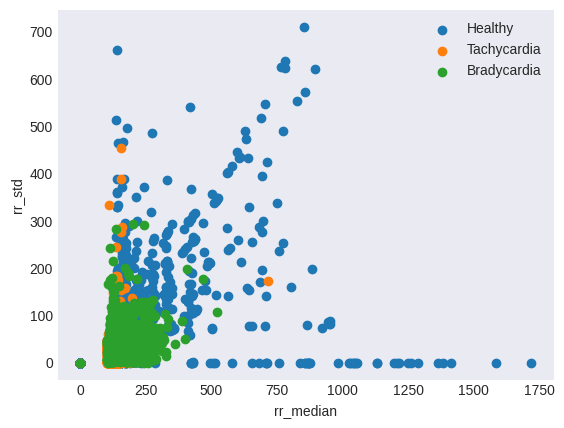

In [72]:
features= ["rr_median", "rr_std"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

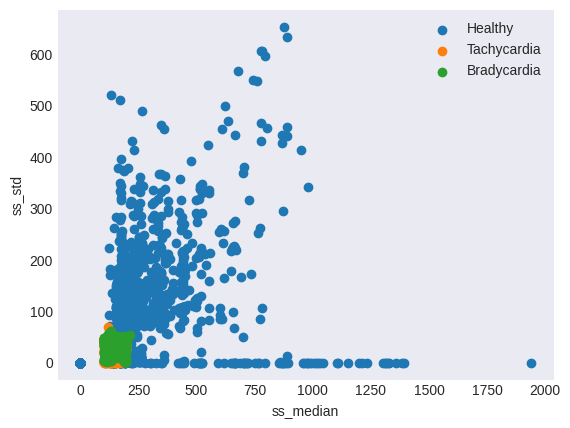

In [73]:
features= ["ss_median", "ss_std"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

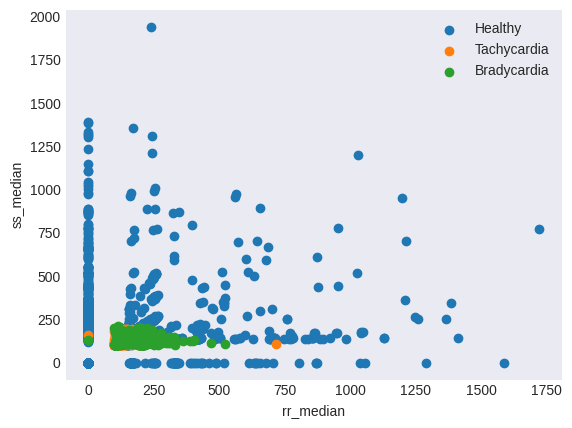

In [76]:
features= ["rr_median", "ss_median"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

Next, find features most important for distinguishing the other arrhythmias

In [77]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

labels=["Healthy", "Ventricular_Flutter_Fib", "Ventricular_Tachycardia", "Atrial_Fibrillation"]
array = samples_df.fillna(0).loc[samples_df["Labels"].isin(labels)].copy()
X = array.iloc[:,1:]
y = array["Labels"]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
display(pd.DataFrame({"Features": model.feature_names_in_, "Importances": model.feature_importances_}).sort_values("Importances", ascending=False))


Features  Importances
4        num_valleys     0.172401
3          num_peaks     0.138579
2           dist_std     0.109133
9          ss_median     0.097397
10            ss_std     0.087961
7          rr_median     0.086505
0        diff_median     0.076677
8             rr_std     0.069878
6   second_peak_freq     0.064075
5    first_peak_freq     0.051264
1        dist_median     0.046130

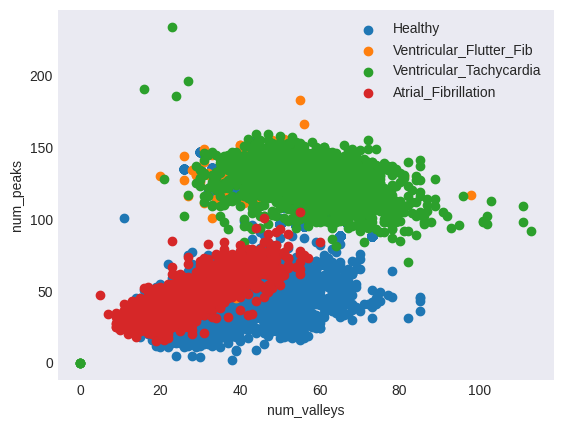

In [78]:
features= ["num_valleys", "num_peaks"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

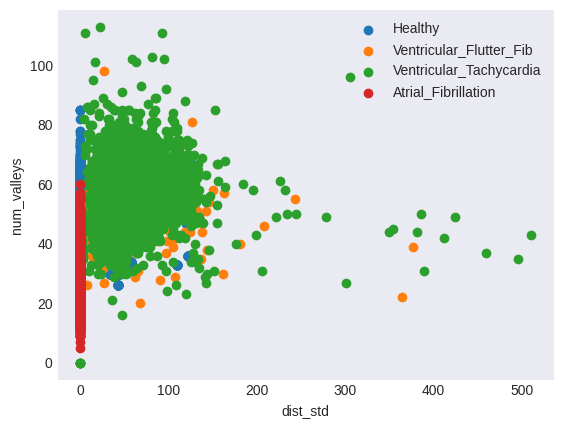

In [79]:
features= ["dist_std", "num_valleys"]

for label in labels:
    plt.scatter(array.loc[array["Labels"]==label, features[0]], array.loc[array["Labels"]==label, features[1]], label=label)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

## Plot UMAP

In [26]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [27]:
import umap
from sklearn.preprocessing import StandardScaler

umap_df=samples_df.loc[samples_df["Labels"].isin(["Tachycardia", "Bradycardia", "Healthy"])].copy()
umap_df=umap_df.fillna(0)
umap_df.reset_index(inplace=True, drop=True)
display(umap_df)
reducer = umap.UMAP(random_state=6)
scaled_data = StandardScaler().fit_transform(umap_df.drop(["Labels"], axis=1))
embedding = reducer.fit_transform(scaled_data)

Labels  diff_median  dist_median  dist_std  num_peaks  num_valleys  \
0    Healthy     0.012899    -0.001127  0.107125         42           37   
1    Healthy     0.012899    -0.001127  0.107125         42           37   
2    Healthy     0.012899    -0.001127  0.107125         42           37   
3    Healthy     0.012899    -0.001127  0.107125         42           37   
4    Healthy     0.012899    -0.001127  0.107125         42           37   
..       ...          ...          ...       ...        ...          ...   
464  Healthy     0.004028    -0.000256  0.027124         99           45   
465  Healthy     0.005235    -0.000348  0.034318         90           68   
466  Healthy     0.004287    -0.000170  0.077504         70           67   
467  Healthy     0.004293    -0.000300  0.037204        135           49   
468  Healthy     0.008964    -0.000402  0.051354         84           70   

     first_peak_freq  second_peak_freq  rr_median     rr_std  ss_median  \
0           0.244141          0.854492      145.0   0.828487      145.0   
1           0.244141          0.854492      145.0   0.828487      145.0   
2           0.244141          0.854492      145.0   0.828487      145.0   
3           0.244141          0.854492      145.0   0.828487      145.0   
4           0.244141          0.854492      145.0   0.828487      145.0   
..               ...               ...        ...        ...        ...   
464         1.710655          2.565982      294.0  13.971399      390.0   
465         0.366569          2.077224      156.0   1.726919      156.0   
466         0.855327          3.054741        0.0   0.000000      146.0   
467         0.488759          0.977517      249.0  30.098796      240.0   
468         0.244379          7.942326      156.0   0.986013      156.0   

         ss_std  
0      0.948371  
1      0.948371  
2      0.948371  
3      0.948371  
4      0.948371  
..          ...  
464  188.097847  
465    1.833289  
466   89.096801  
467   60.698929  
468    9.683757  

[469 rows x 12 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


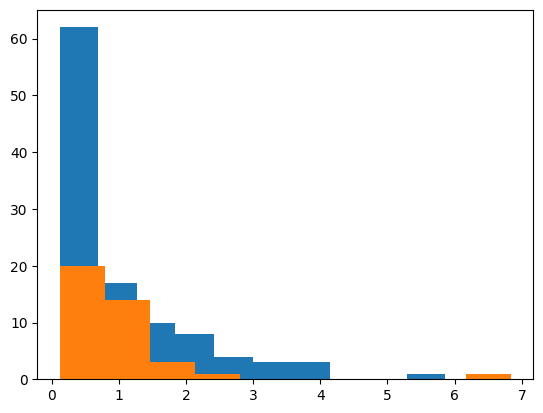

In [28]:
plt.hist(samples_df.loc[samples_df["Labels"]=="Tachycardia","first_peak_freq"])
plt.hist(samples_df.loc[samples_df["Labels"]=="Bradycardia","first_peak_freq"])
plt.show()

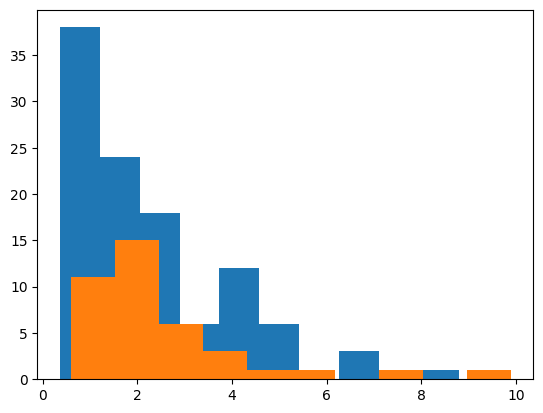

In [29]:
plt.hist(samples_df.loc[samples_df["Labels"]=="Tachycardia","second_peak_freq"])
plt.hist(samples_df.loc[samples_df["Labels"]=="Bradycardia","second_peak_freq"])
plt.show()

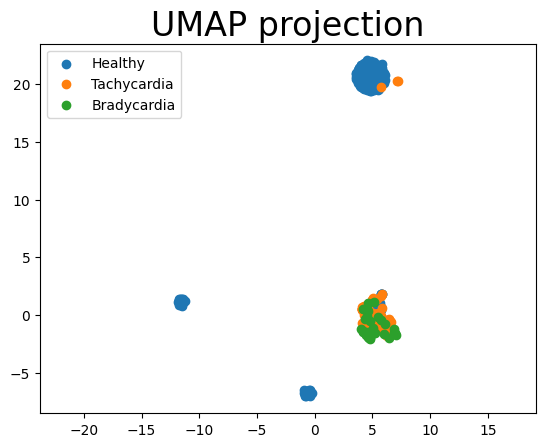

In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
c_encoded=label_encoder.fit_transform(umap_df["Labels"])

for label in umap_df["Labels"].unique():
    plt.scatter(
        embedding[umap_df.loc[umap_df["Labels"]==label].drop("Labels", axis=1).index, 0],
        embedding[umap_df.loc[umap_df["Labels"]==label].drop("Labels", axis=1).index, 1],
        label=label)
plt.legend()
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24);

## Tachycardia and Bradycardia
These two need other methods since they are regular heartbeats, it's the pace that's abnormal. There are two methods:
1. Time domain peak detection to find the median peak-to-peak interval, or
2. Looking for the first peak in frequency domain, which usually corresponds to the heart rate (FAILED).

The challenging part is differentiating between the QRS complex peaks of a normal heart rate and the (double???) wave in a bradicardia ECG. Tachycardia will always be obvious, but bradycardia will be hard to tell.

## for label in df_filtered["Label"].unique():
    # Append true alarms
    for i in range(get_num_waves(label)):
        signals.append(getWaveform(label, i, "ECG"))
        labels.append(label)
    # Append a false alarm
    for i in range(get_num_waves(label, 0)):
        signals.append(getWaveform(label, 0, "ECG", trueAlarm=0))
        labels.append("Healthy")Parameter Tester
This code displays the UMAP for every combination of value 1 and value 2. Replace any 2 parameters you want to test with val1 and val2 in order to find the combination that gives the best UMAP cluster separation.

Value1=0.1, Value2=0.1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


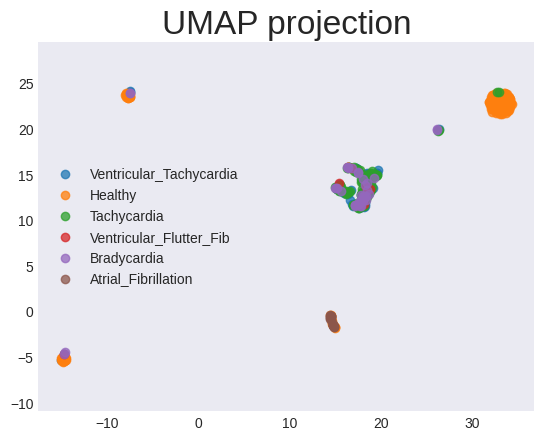

Value1=0.1, Value2=0.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


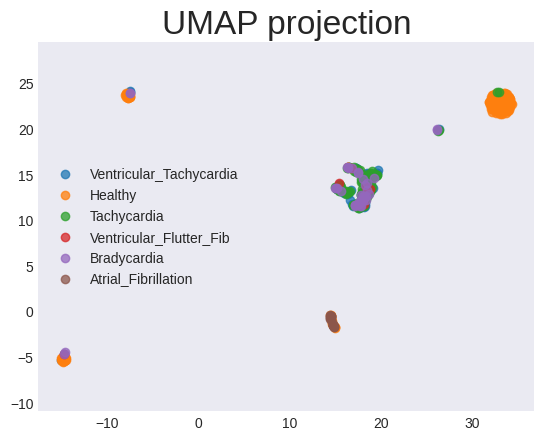

Value1=0.1, Value2=1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


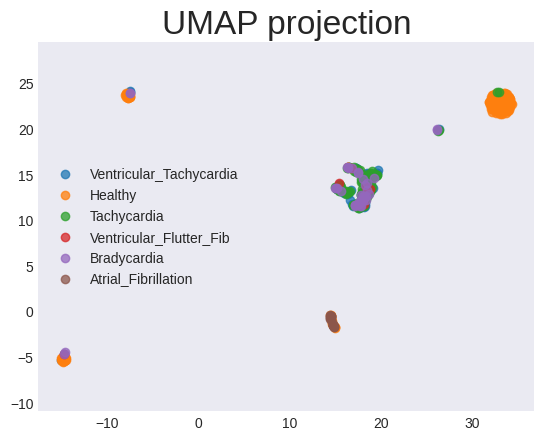

Value1=0.1, Value2=1.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


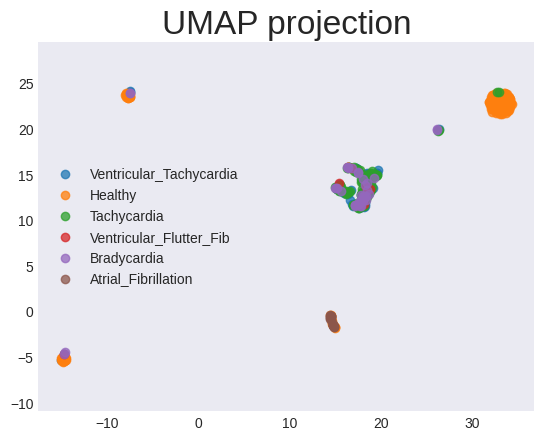

Value1=0.1, Value2=3


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


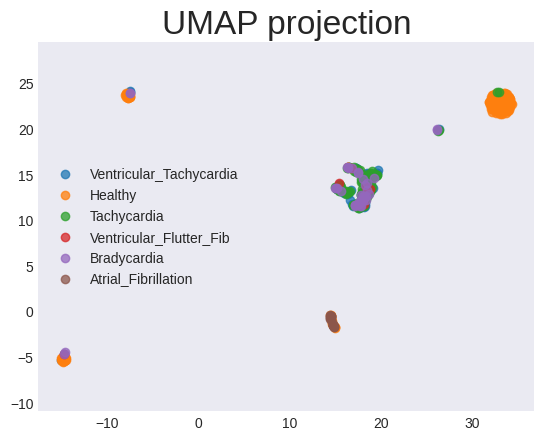

Value1=0.5, Value2=0.1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


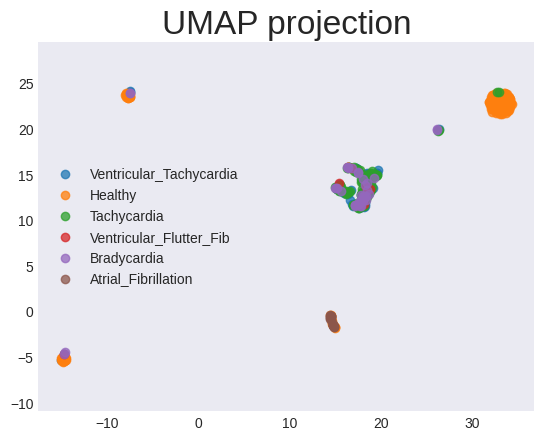

Value1=0.5, Value2=0.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


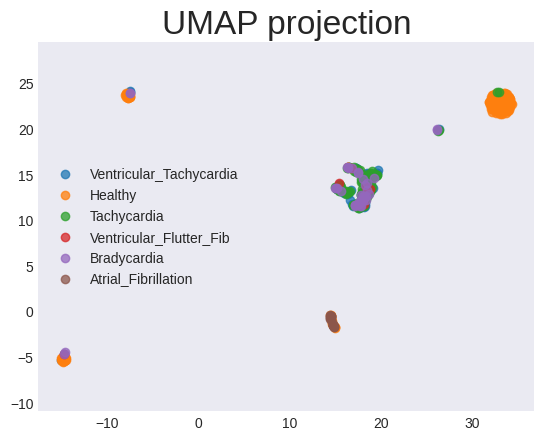

Value1=0.5, Value2=1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


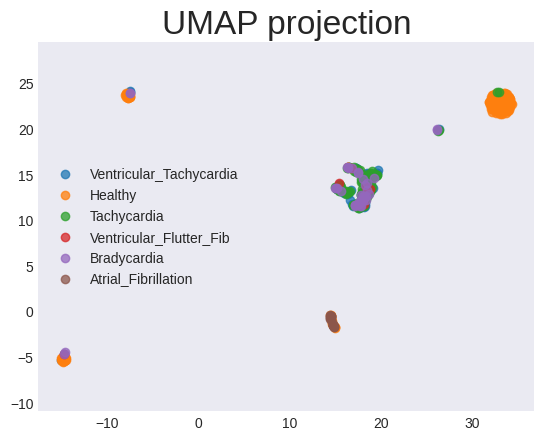

Value1=0.5, Value2=1.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


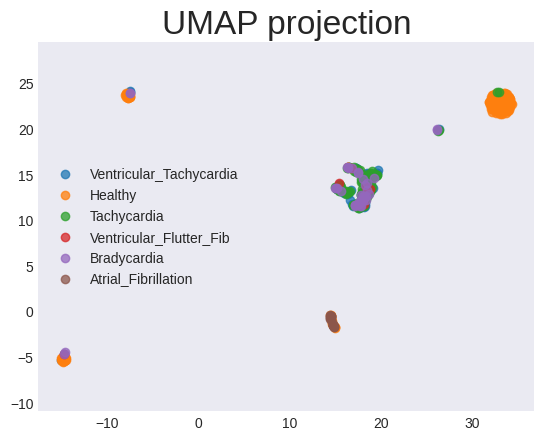

Value1=0.5, Value2=3


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


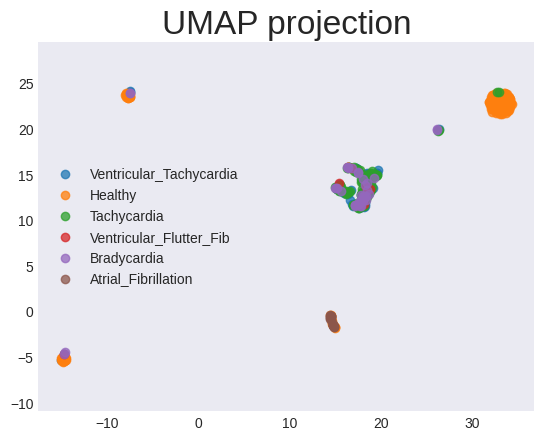

Value1=1, Value2=0.1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


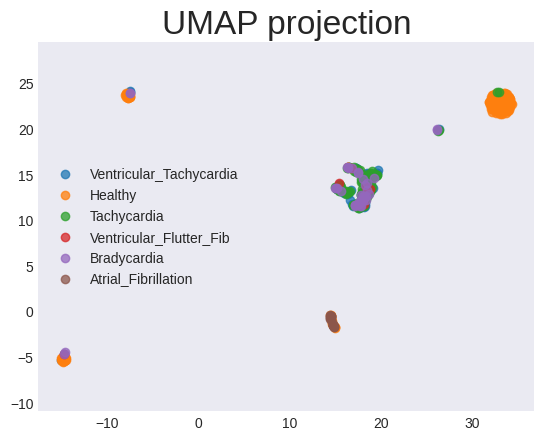

Value1=1, Value2=0.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


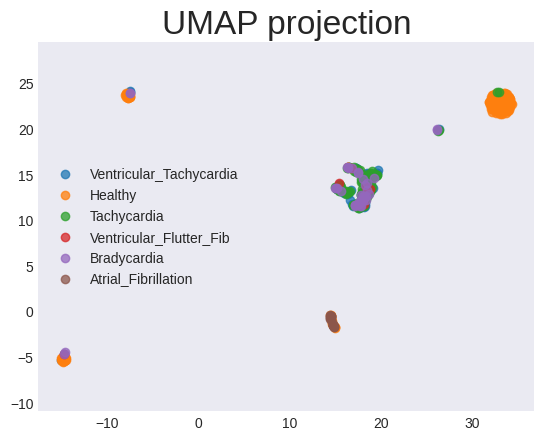

Value1=1, Value2=1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


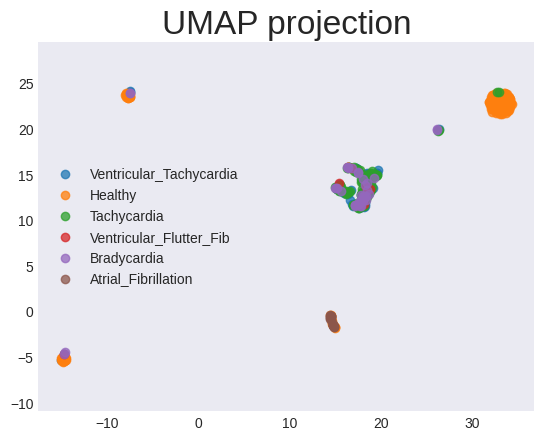

Value1=1, Value2=1.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


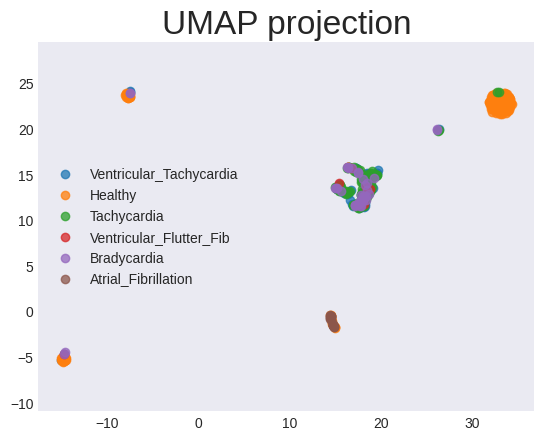

Value1=1, Value2=3


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


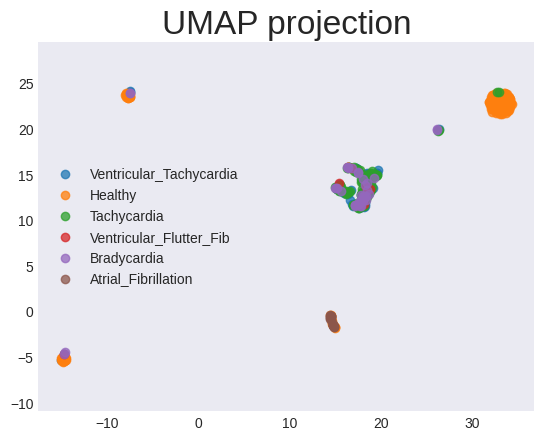

Value1=1.5, Value2=0.1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


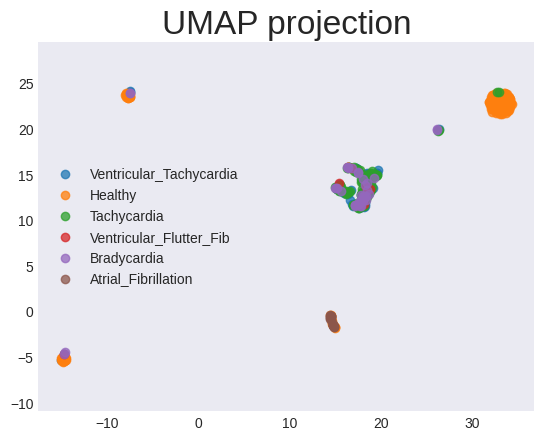

Value1=1.5, Value2=0.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


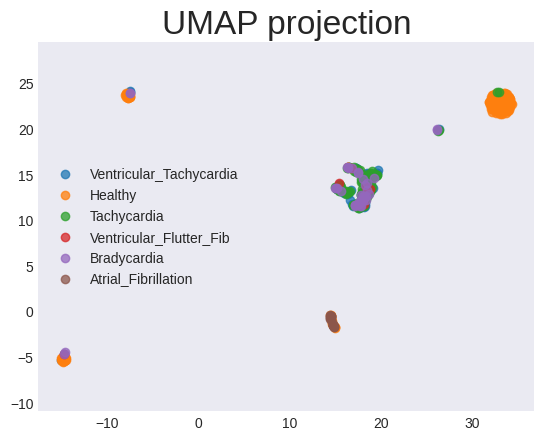

Value1=1.5, Value2=1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


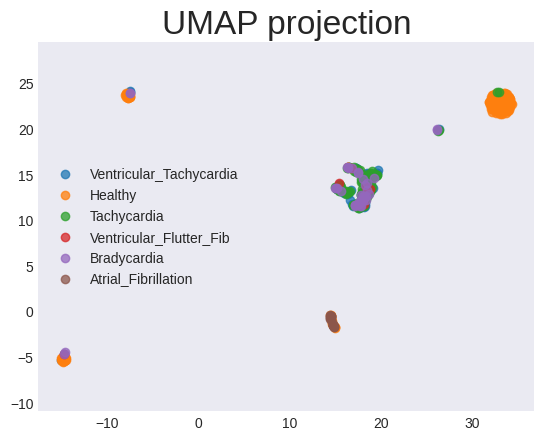

Value1=1.5, Value2=1.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


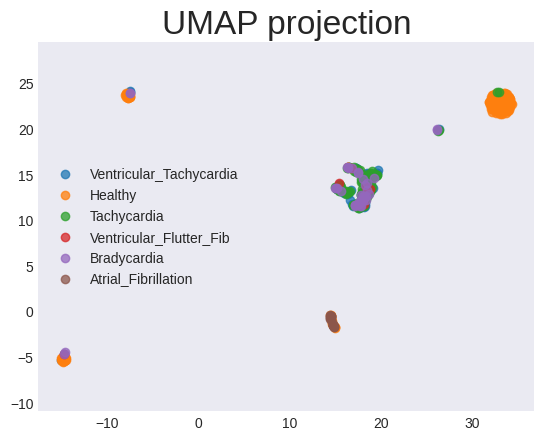

Value1=1.5, Value2=3


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


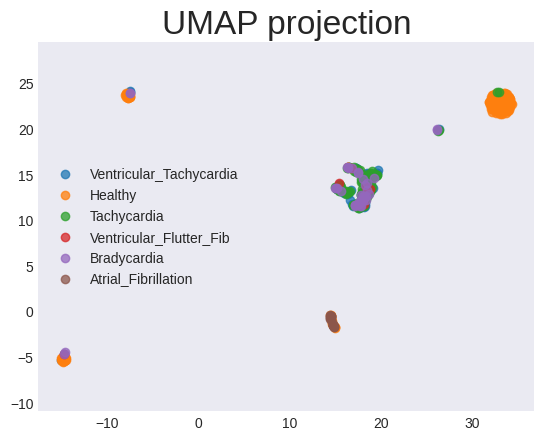

Value1=3, Value2=0.1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


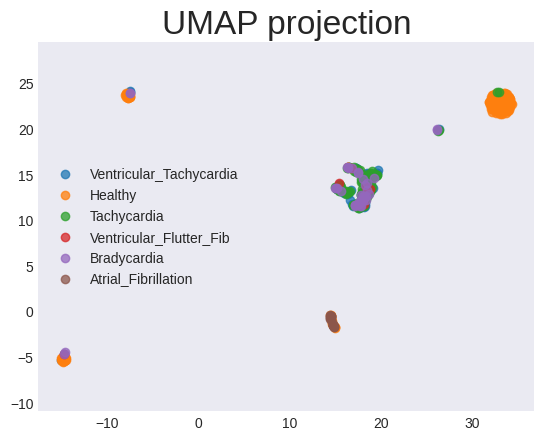

Value1=3, Value2=0.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


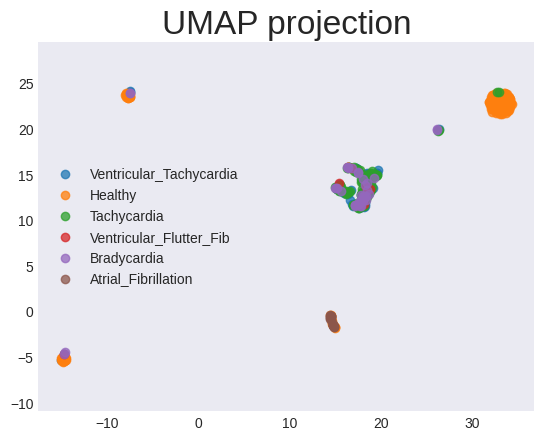

Value1=3, Value2=1


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


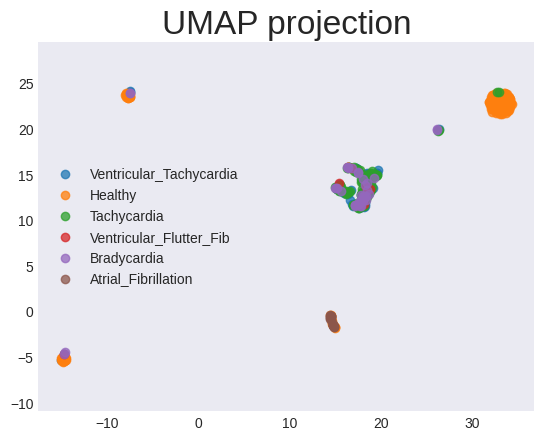

Value1=3, Value2=1.5


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


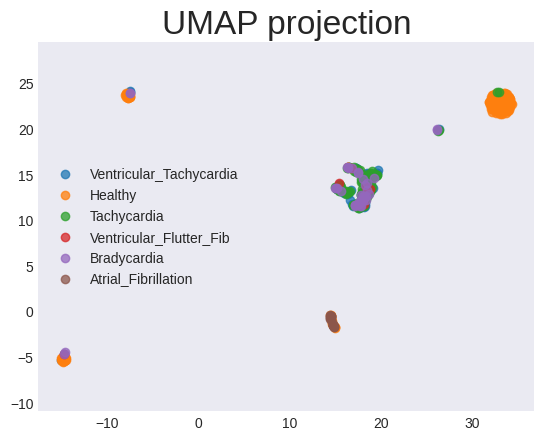

Value1=3, Value2=3


Labels  diff_median  dist_median  dist_std  num_peaks  \
0    Ventricular_Tachycardia     0.013433    -0.001835  0.043718         41   
1    Ventricular_Tachycardia     0.017611    -0.000804  0.088982         44   
2    Ventricular_Tachycardia     0.050849    -0.003259  0.111964         19   
3    Ventricular_Tachycardia     0.033240    -0.002719  0.038062         44   
4    Ventricular_Tachycardia     0.016016    -0.001311  0.044069         40   
..                       ...          ...          ...       ...        ...   
550                  Healthy     0.004521    -0.000388  0.025205         71   
551                  Healthy     0.008651    -0.000706  0.105302         75   
552                  Healthy     0.005215    -0.000518  0.106996         59   
553                  Healthy     0.004715    -0.000696  0.036363         67   
554                  Healthy     0.013666    -0.000825  0.040037         75   

     num_valleys  first_peak_freq  second_peak_freq  
0             36         0.122070          1.342773  
1             42         1.220703          4.638672  
2             22         0.244141          2.319336  
3             41         1.342773          2.685547  
4             41         1.098633          3.295898  
..           ...              ...               ...  
550           73         0.855327          3.299120  
551           68         0.366569          1.588465  
552           56         0.855327          2.077224  
553           65         0.977517          3.054741  
554           70         0.244379          1.588465  

[555 rows x 8 columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


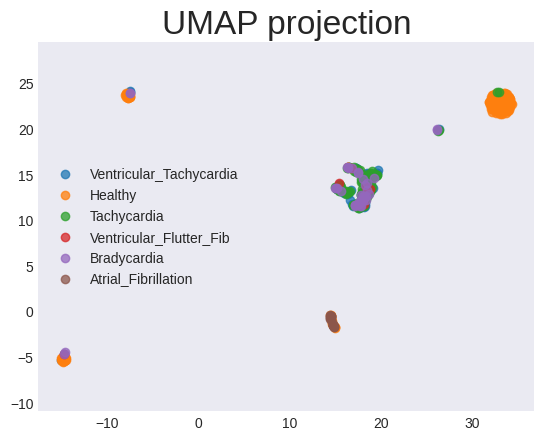

In [31]:
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 250

signals=[]
labels=[]

for label in df_filtered["Label"].unique():
    # Append true alarms
    for i in range(get_num_waves(label)):
        signals.append(getWaveform(label, i, "ECG"))
        labels.append(label)
    # Append a false alarm
    for i in range(get_num_waves(label, 0)):
        signals.append(getWaveform(label, 0, "ECG", trueAlarm=0))
        labels.append("Healthy")

values1=[0.1,0.5,1,1.5,3]
values2=[0.1,0.5,1,1.5,3]

for val1 in values1:
    for val2 in values2:
        print(f"Value1={val1}, Value2={val2}")
        labels_passed=[]
        diff_median=[]
        distance_median=[]
        distance_std=[]
        num_peaks=[]
        num_valleys=[]
        first_peak_freq=[]
        second_peak_freq=[]
        
        
        for i, signal in enumerate(signals):
            # Time-domain parameters
            N = len(signal)
        
            # Frequency-domain parameters
            yf = fft(signal)
            xf = fftfreq(N, 1 / fs)[:N // 2]
            yf_processed = 2.0 / N * np.abs(yf[:N // 2])
        
            # Detect peaks and valleys
            peaks, _ = find_peaks(2.0/N * np.abs(yf[0:N//2]),
                                  height=None, 
                                  threshold=None, 
                                  distance=10,
                                  prominence=0.0005,
                                  width=2,
                                  rel_height=1.5)
            
            valleys, _ = find_peaks(-2.0/N * np.abs(yf[0:N//2]),
                                  height=None, 
                                  threshold=None, 
                                  distance=10,
                                  prominence=0.0005,
                                  width=2,
                                  rel_height=1)
        
            if(not np.isnan(yf).any()):
                diff_median.append(np.median(2.0/N * np.abs(yf[:N//2])[peaks])-np.median(2.0/N * np.abs(yf[:N//2])[valleys]))
                num_peaks.append(len(peaks))
                num_valleys.append(len(valleys))
                intervals=[]
                for pi in range(len(peaks)-1):
                    intervals.append(2.0/N * np.abs(yf[:N//2])[peaks[pi+1]]-2.0/N * np.abs(yf[:N//2])[peaks[pi]])
                distance_median.append(np.median(intervals))
                distance_std.append(np.std(intervals))
                first_peak_freq.append(xf[peaks[0]])
                second_peak_freq.append(xf[peaks[1]])
                labels_passed.append(labels[i])
        
        samples_df=pd.DataFrame({"Labels": labels_passed, "diff_median":diff_median, "dist_median": distance_median, "dist_std": distance_std, "num_peaks":num_peaks, "num_valleys":num_valleys, "first_peak_freq":first_peak_freq, "second_peak_freq":second_peak_freq})
        samples_df.fillna(0, inplace=True)
        
        # UMAP
        umap_df=samples_df.loc[samples_df["Labels"].isin(["Ventricular_Tachycardia", "Ventricular_Flutter_Fib", "Atrial_Fibrillation", "Healthy", "Tachycardia", "Bradycardia"])].copy()
        umap_df.reset_index(inplace=True, drop=True)
        display(umap_df)
        reducer = umap.UMAP(random_state=6)
        scaled_data = StandardScaler().fit_transform(umap_df.drop(["Labels"], axis=1))
        embedding = reducer.fit_transform(scaled_data)
        from sklearn import preprocessing
        label_encoder = preprocessing.LabelEncoder()
        c_encoded=label_encoder.fit_transform(umap_df["Labels"])
        plt.style.use('seaborn-v0_8-dark')
        for label in umap_df["Labels"].unique():
            plt.scatter(
                embedding[umap_df.loc[umap_df["Labels"]==label].drop("Labels", axis=1).index, 0],
                embedding[umap_df.loc[umap_df["Labels"]==label].drop("Labels", axis=1).index, 1],
                label=label,
                alpha=0.75)
        plt.legend()
        plt.gca().set_aspect('equal', 'datalim')
        plt.title('UMAP projection', fontsize=24);
        plt.show()
